# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install -U scikit-learn==1.2.2 imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [3]:
df = pd.read_csv ('/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [5]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [6]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [7]:
for col in df.columns:
    print(f"Distribusi setiap value pada kolom '{col}':")
    print(df[col].value_counts())
    print ("-" * 50)

Distribusi setiap value pada kolom 'sex':
sex
Male      526415
Female    464931
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'age':
age
40    130385
50    129434
45    118355
55    111223
60    106063
35     84726
30     77600
25     64370
65     52961
70     50666
75     25333
20     21971
80     14968
85      3291
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'height':
height
160    181809
165    178228
170    166328
155    165678
150    107929
175     98850
145     39176
180     35970
140      9100
185      6588
135      1241
190       363
130        86
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'weight':
weight
60     151134
55     150415
65     141241
50     125079
70     122281
75      90207
45      63047
80      58176
85      33708
90      18250
40      16639
95       9655
100    

In [8]:
print(df.duplicated().sum())
df = df.drop_duplicates()

26


DRK_YN
N    495844
Y    495476
Name: count, dtype: int64


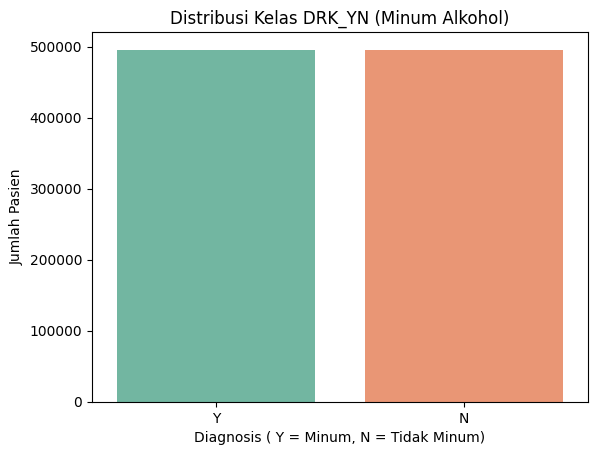

In [9]:
print(df['DRK_YN'].value_counts())

sns.countplot(x='DRK_YN', data=df, palette='Set2')
plt.title('Distribusi Kelas DRK_YN (Minum Alkohol)')
plt.xlabel('Diagnosis ( Y = Minum, N = Tidak Minum)')
plt.ylabel('Jumlah Pasien')
plt.show()

In [10]:
kolom_numerik = [
    'age', 'height', 'weight', 'waistline',
    'sight_left', 'sight_right',
    'SBP', 'DBP', 'BLDS',
    'tot_chole', 'HDL_chole', 'LDL_chole',
    'triglyceride', 'hemoglobin', 'serum_creatinine',
    'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'
]

kategorikal = ['sex', 'hear_left','hear_right', 'SMK_stat_type_cd','urine_protein']

cek outlier metode *IQR*

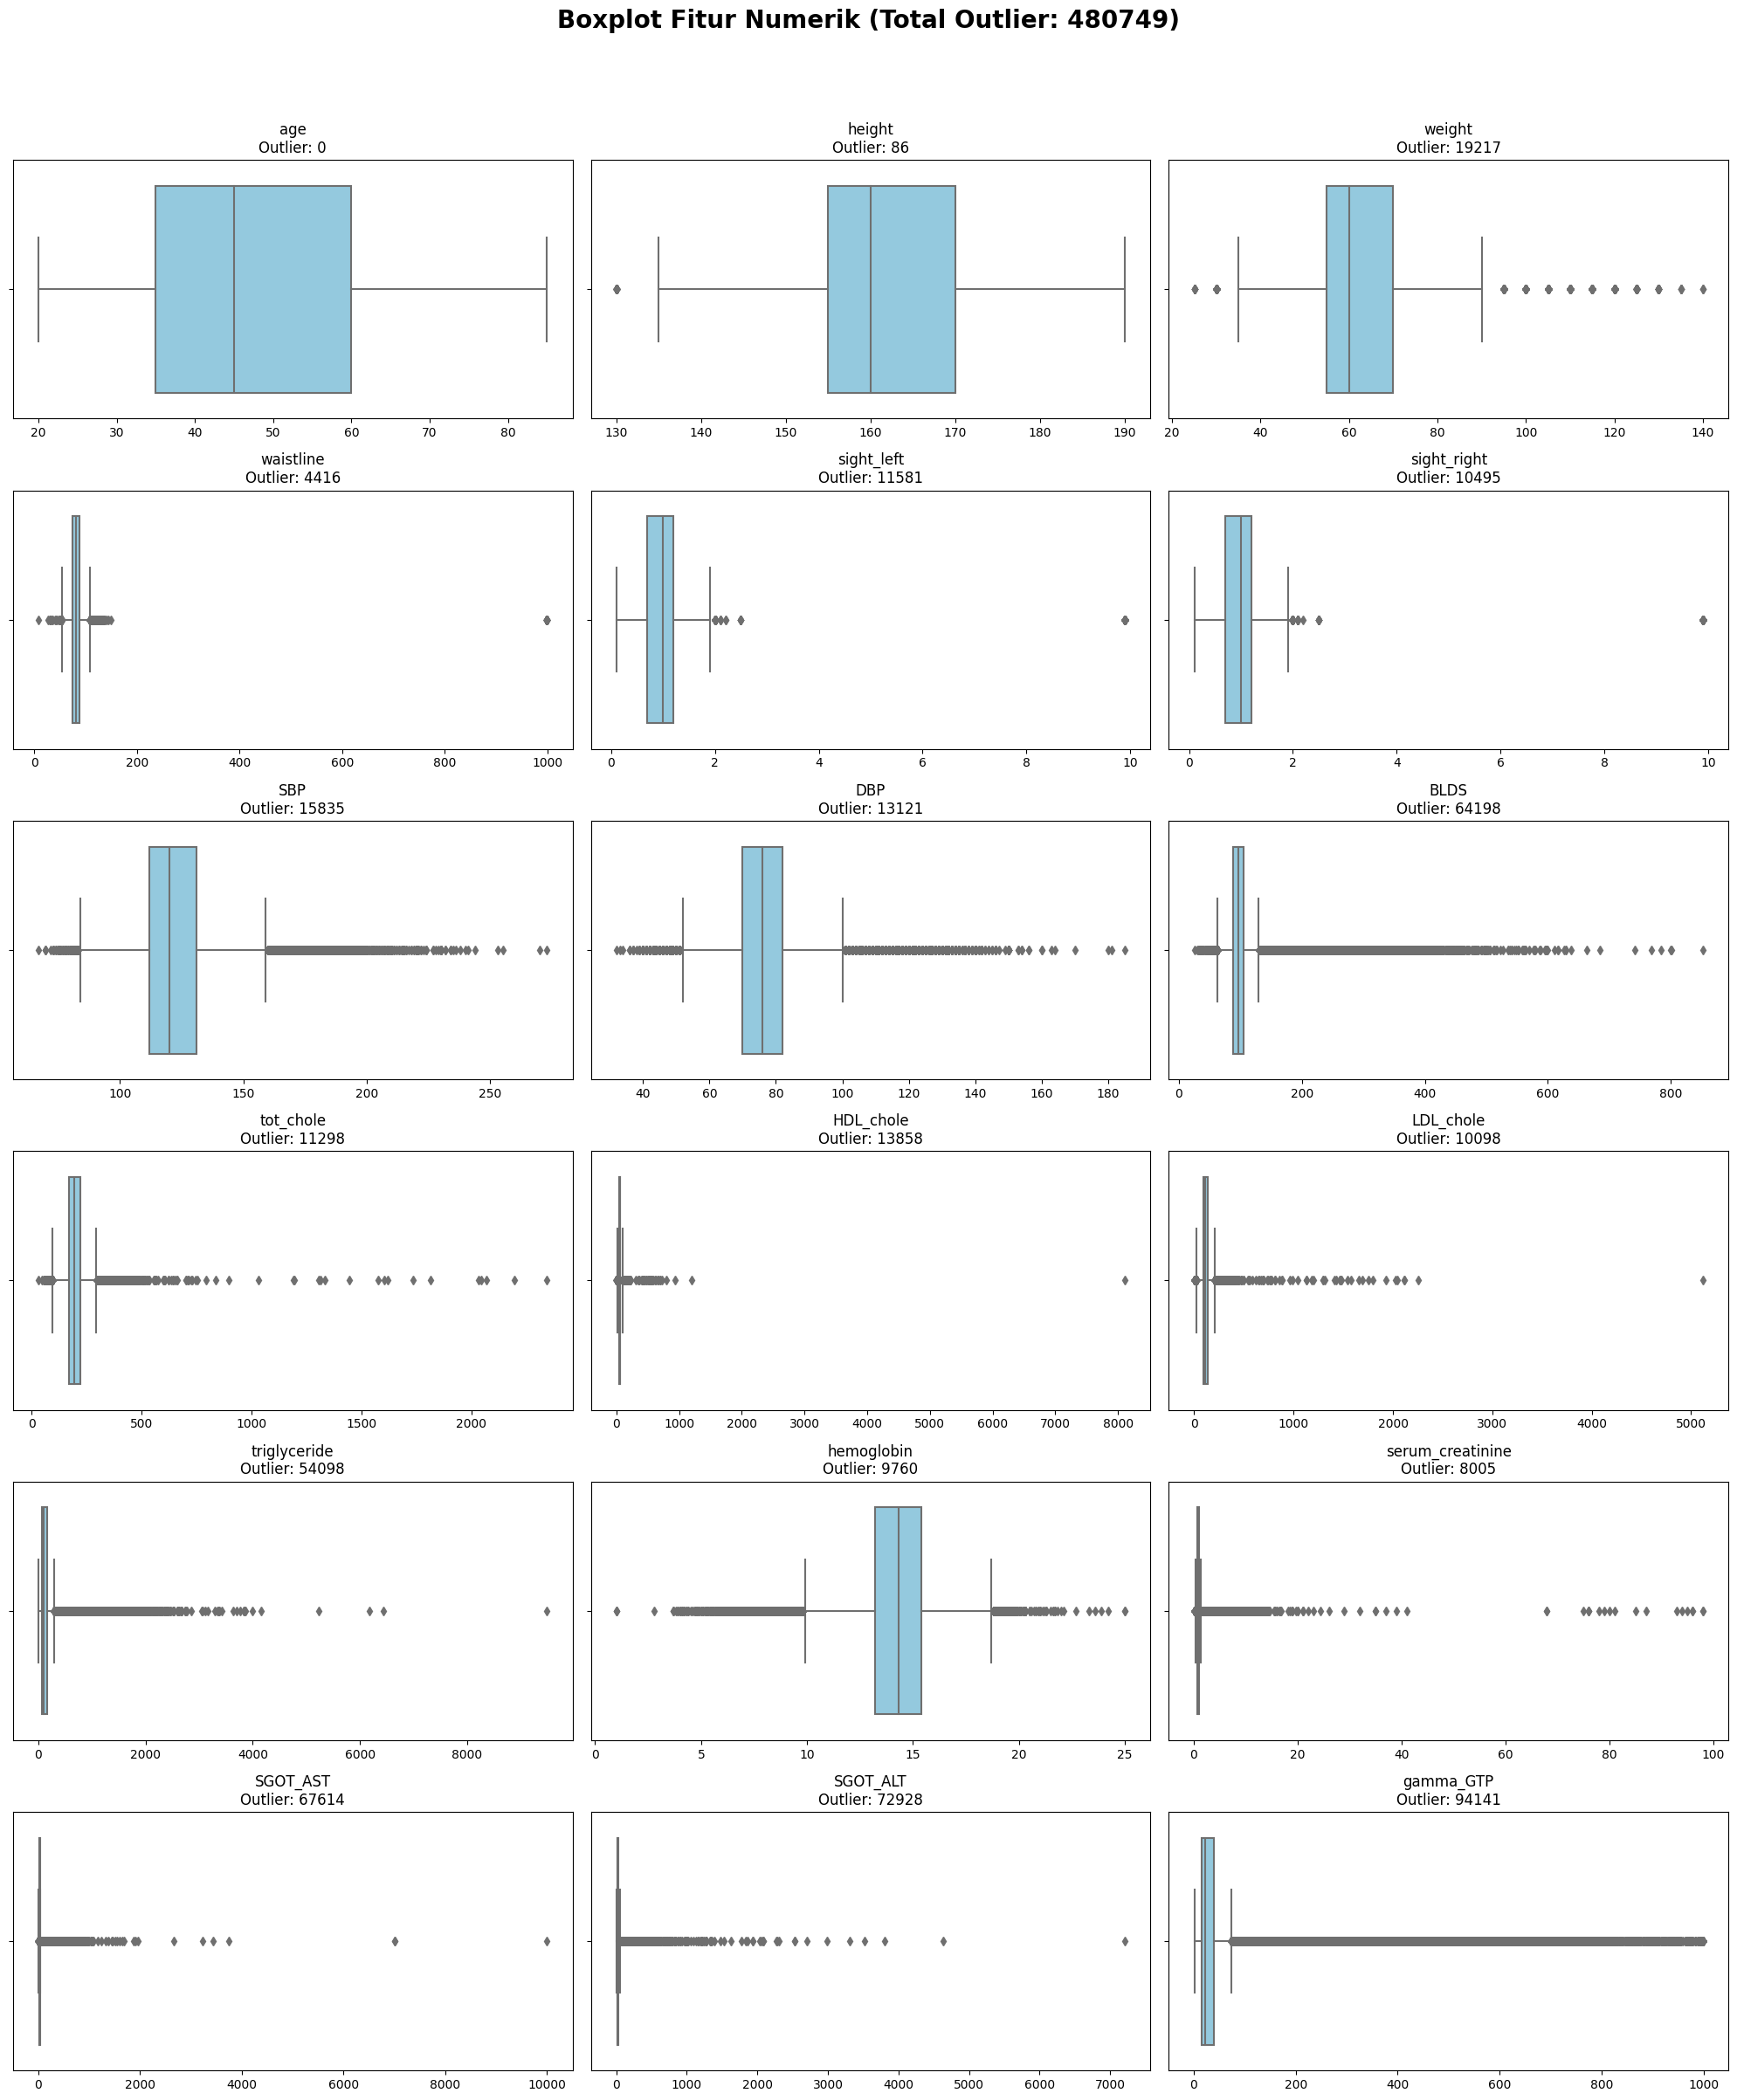

In [11]:
def detect_outliers_iqr(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return df[(df[col] < low) | (df[col] > high)]

outlier_info = {}
total = 0
for col in kolom_numerik:
    n = len(detect_outliers_iqr(df, col))
    outlier_info[col] = n
    total += n

plt.figure(figsize=(20, 24))
for i, col in enumerate(kolom_numerik):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"{col}\nOutlier: {outlier_info[col]}", fontsize=12)
    plt.xlabel("")

plt.suptitle(f"Boxplot Fitur Numerik (Total Outlier: {total})", fontsize=20, fontweight='bold', y=1)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Processing

In [12]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le = LabelEncoder()
for col in kategorikal:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [13]:
df_encoded['DRK_YN'] = df_encoded['DRK_YN'].map({'N': 0, 'Y': 1}).astype(int)

In [14]:
print(df_encoded['DRK_YN'].unique())

[1 0]


In [15]:
X = df_encoded.drop('DRK_YN', axis=1)
y = df_encoded['DRK_YN']

## Seleksi Fitur

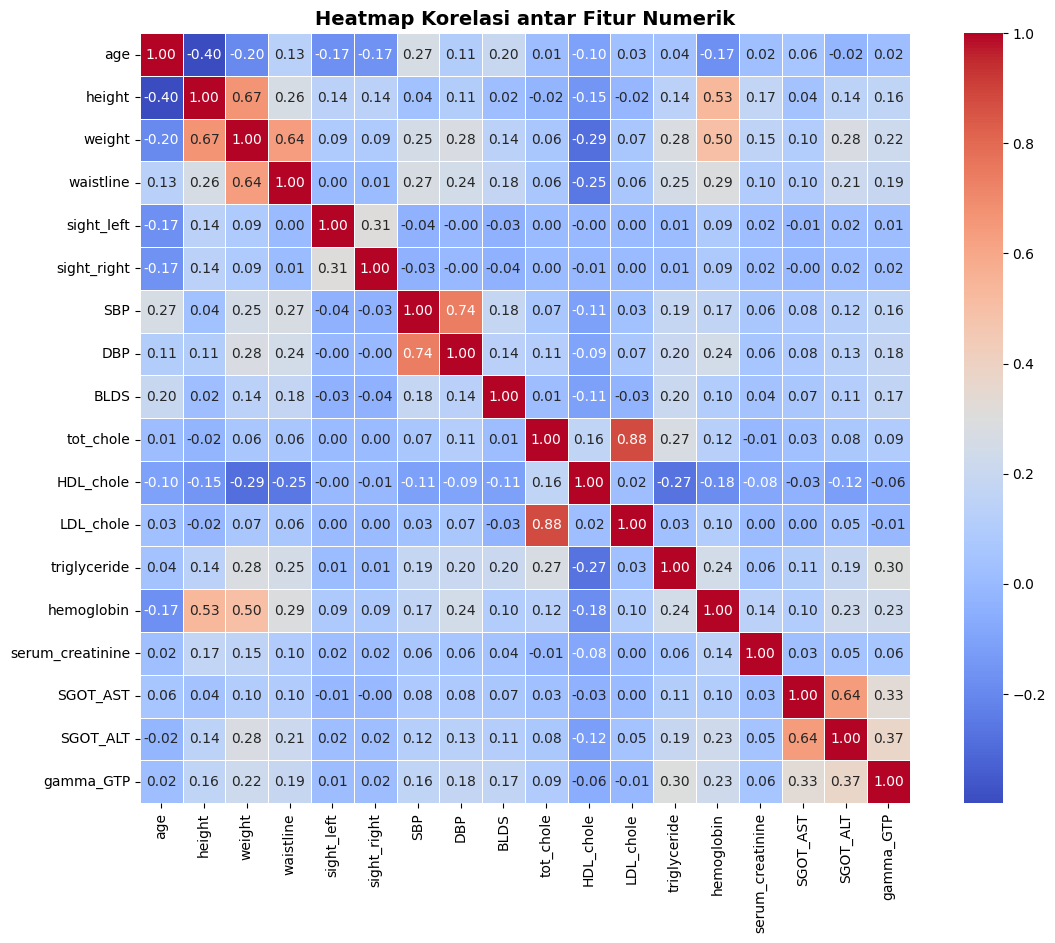

In [16]:
df_numerik = df_encoded[kolom_numerik]

corr_matrix = df_numerik.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Heatmap Korelasi antar Fitur Numerik", fontsize=14, weight='bold')
plt.show()

In [17]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr = upper.stack().reset_index()
high_corr.columns = ['Fitur 1', 'Fitur 2', 'Korelasi']
high_corr = high_corr[high_corr['Korelasi'].abs() > 0.7].sort_values(by='Korelasi', ascending=False)

print("Pasangan fitur numerik dengan korelasi tinggi (> 0.7):")
display(high_corr)

Pasangan fitur numerik dengan korelasi tinggi (> 0.7):


,Fitur 1,Fitur 2,Korelasi
118,tot_chole,LDL_chole,0.877367
87,SBP,DBP,0.741126


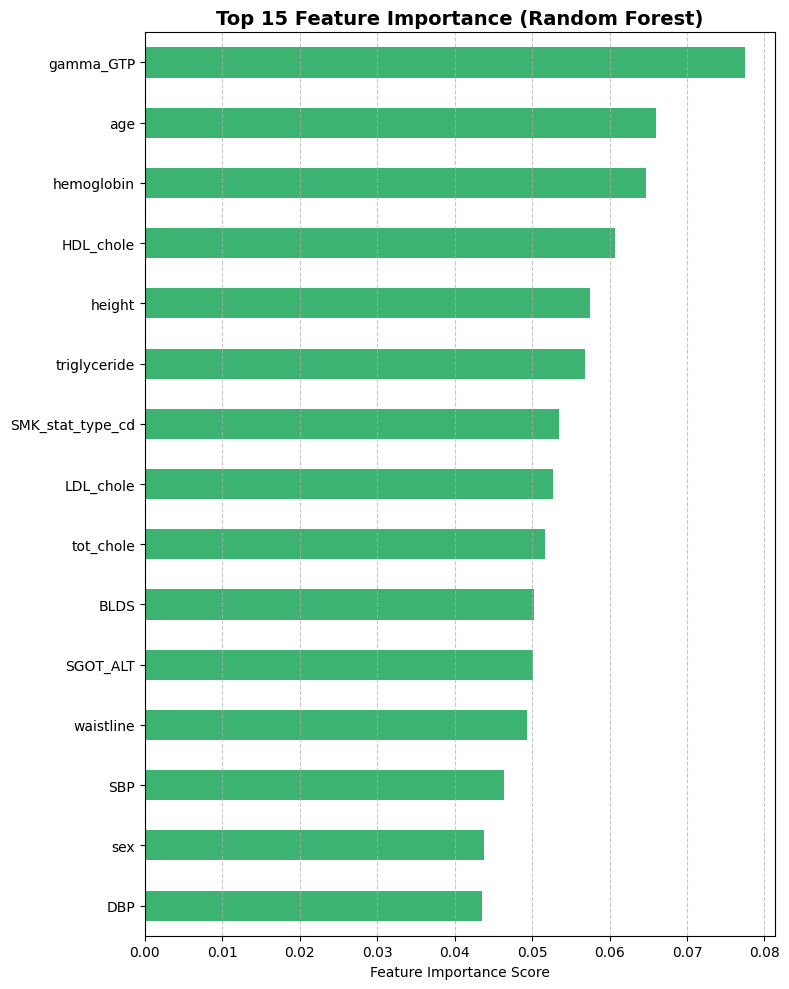

Top 15 features:
['gamma_GTP', 'age', 'hemoglobin', 'HDL_chole', 'height', 'triglyceride', 'SMK_stat_type_cd', 'LDL_chole', 'tot_chole', 'BLDS', 'SGOT_ALT', 'waistline', 'SBP', 'sex', 'DBP']


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(8, 10))
importances_sorted.head(15).plot(kind='barh', color='mediumseagreen')
plt.title("Top 15 Feature Importance (Random Forest)", fontsize=14, fontweight='bold')
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

top15_features = importances_sorted.head(15).index.tolist()

print("Top 15 features:")
print(top15_features)

In [19]:
X_top15 = X[top15_features]

In [20]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X_top15, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.125,
    random_state=42,
    stratify=y_temp
)

print("Train :", X_train.shape)
print("Val   :", X_val.shape)
print("Test  :", X_test.shape)


Train : (693924, 15)
Val   : (99132, 15)
Test  : (198264, 15)


In [21]:
from sklearn.preprocessing import RobustScaler

numerik = ['age', 'gamma_GTP', 'hemoglobin', 'HDL_chole', 'triglyceride',
    'LDL_chole', 'tot_chole', 'height', 'waistline', 'BLDS',
    'SBP', 'SGOT_ALT', 'DBP']

scaler = RobustScaler()

X_train[numerik] = scaler.fit_transform(X_train[numerik])
X_test[numerik] = scaler.transform(X_test[numerik])
X_val[numerik] = scaler.transform(X_val[numerik])

In [22]:
X_train.head(20)

,gamma_GTP,age,hemoglobin,HDL_chole,height,triglyceride,SMK_stat_type_cd,LDL_chole,tot_chole,BLDS,SGOT_ALT,waistline,SBP,sex,DBP
565920,-0.391304,-0.8,-0.545455,0.30,-0.666667,-0.500000,0,0.326087,0.14,-0.647059,-0.357143,-0.882353,-0.526316,0,-0.500000
616392,-0.391304,-0.8,-0.363636,-0.25,0.333333,-0.465116,0,-0.173913,-0.52,-1.117647,-1.000000,-1.397059,-0.736842,0,-1.583333
294123,0.347826,0.2,0.636364,-1.00,0.666667,2.093023,1,-0.217391,0.02,-0.176471,0.714286,0.794118,0.052632,1,0.166667
659006,-0.217391,0.2,-1.454545,0.75,-0.333333,-0.197674,0,-0.108696,0.02,-0.529412,0.071429,-1.213235,-1.421053,0,-1.583333
240093,-0.391304,1.2,-0.318182,-0.90,-0.666667,0.348837,0,-0.282609,-0.60,1.117647,0.000000,1.838235,0.684211,0,0.166667
62632,-0.565217,-0.6,-0.818182,0.60,-0.333333,-0.581395,0,-0.695652,-0.72,-0.117647,-0.642857,-0.941176,-1.263158,0,-2.000000
662507,1.956522,0.2,1.000000,-0.60,0.333333,0.674419,2,1.108696,0.90,-0.058824,1.428571,0.147059,0.631579,1,-0.416667
135999,-0.130435,-0.2,0.363636,-0.05,0.333333,-0.034884,1,0.608696,0.42,0.000000,0.428571,0.294118,1.789474,1,1.583333
836383,-0.130435,1.0,0.636364,0.50,-0.666667,0.534884,0,1.065217,1.26,1.235294,0.357143,0.323529,1.052632,0,1.166667
232221,1.043478,0.6,-0.272727,-0.35,0.333333,-0.569767,1,0.326087,-0.14,1.941176,-0.500000,1.250000,-0.105263,1,0.166667


In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [24]:
# Sebelum SMOTE
print("Distribusi label sebelum SMOTE:")
print(y_train.value_counts())

# Sesudah SMOTE
print("\nDistribusi label sesudah SMOTE:")
print(y_train_bal.value_counts())

Distribusi label sebelum SMOTE:
DRK_YN
0    347091
1    346833
Name: count, dtype: int64

Distribusi label sesudah SMOTE:
DRK_YN
1    347091
0    347091
Name: count, dtype: int64


# Model

## Random Forest

=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

          No       0.73      0.73      0.73     99169
         Yes       0.73      0.73      0.73     99095

    accuracy                           0.73    198264
   macro avg       0.73      0.73      0.73    198264
weighted avg       0.73      0.73      0.73    198264



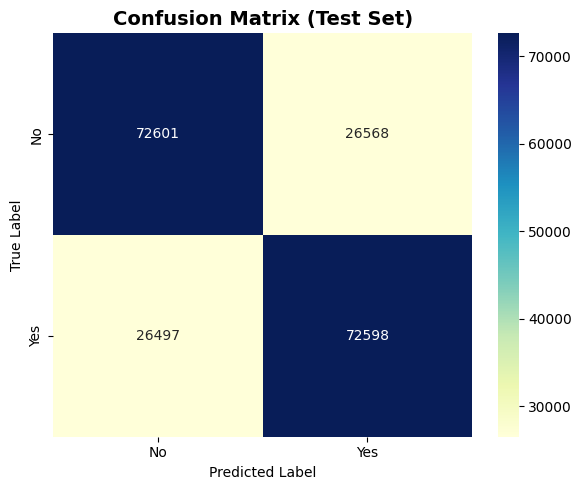

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model_rf= RandomForestClassifier(random_state=42)
model_rf.fit(X_train_bal, y_train_bal)

y_test_pred = model_rf.predict(X_test)
print("=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_test_pred, target_names=['No', 'Yes']))

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Tabnet

In [26]:
pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [27]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier

X_train_np = X_train_bal.to_numpy().astype('float32')
X_val_np = X_val.to_numpy().astype('float32')
X_test_np = X_test.to_numpy().astype('float32')

y_train_np = y_train_bal.to_numpy().astype('int64')
y_val_np = y_val.to_numpy().astype('int64')
y_test_np = y_test.to_numpy().astype('int64')

In [28]:
from pytorch_tabnet.metrics import Metric
from sklearn.preprocessing import LabelEncoder

tabnet_model = TabNetClassifier(
    n_d=8,
    n_a=8,
    n_steps=2,
    gamma=1.5,
    mask_type='sparsemax',
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=0.02),
    verbose=1
)

# Training
tabnet_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.54299 | val_accuracy: 0.727   |  0:00:23s
epoch 1  | loss: 0.52681 | val_accuracy: 0.73123 |  0:00:45s
epoch 2  | loss: 0.52493 | val_accuracy: 0.73235 |  0:01:07s
epoch 3  | loss: 0.52366 | val_accuracy: 0.73348 |  0:01:30s
epoch 4  | loss: 0.52318 | val_accuracy: 0.7275  |  0:01:53s
epoch 5  | loss: 0.52278 | val_accuracy: 0.73318 |  0:02:16s
epoch 6  | loss: 0.5225  | val_accuracy: 0.73151 |  0:02:40s
epoch 7  | loss: 0.5223  | val_accuracy: 0.73395 |  0:03:04s
epoch 8  | loss: 0.52227 | val_accuracy: 0.73088 |  0:03:27s
epoch 9  | loss: 0.52205 | val_accuracy: 0.73432 |  0:03:51s
epoch 10 | loss: 0.52169 | val_accuracy: 0.72997 |  0:04:14s
epoch 11 | loss: 0.52178 | val_accuracy: 0.73514 |  0:04:37s
epoch 12 | loss: 0.52146 | val_accuracy: 0.73164 |  0:05:00s
epoch 13 | loss: 0.52125 | val_accuracy: 0.73486 |  0:05:24s
epoch 14 | loss: 0.52103 | val_accuracy: 0.73047 |  0:05:47s
epoch 15 | loss: 0.52091 | val_accuracy: 0.73382 |  0:06:11s
epoch 16 | loss: 0.52084

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Classification Report (TabNet - Test Set):
              precision    recall  f1-score   support

          No       0.74      0.74      0.74     99169
         Yes       0.74      0.74      0.74     99095

    accuracy                           0.74    198264
   macro avg       0.74      0.74      0.74    198264
weighted avg       0.74      0.74      0.74    198264



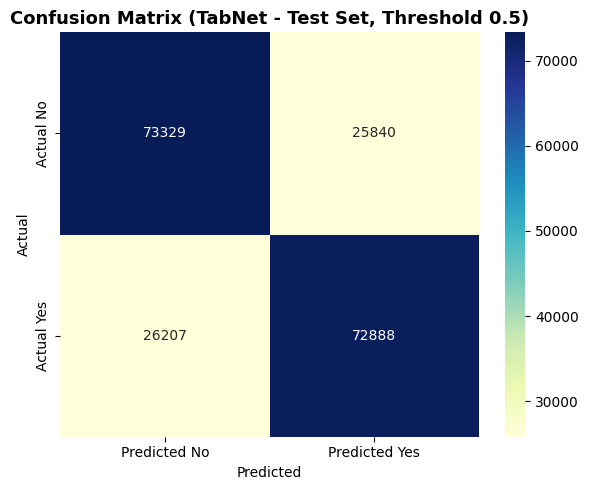

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_test_pred = (tabnet_model.predict_proba(X_test_np)[:, 1] > 0.5).astype(int)

print("Classification Report (TabNet - Test Set):")
print(classification_report(y_test_np, y_test_pred, target_names=['No', 'Yes']))

cm = confusion_matrix(y_test_np, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix (TabNet - Test Set, Threshold 0.5)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## D1 CNN

In [30]:
X_train_bal = X_train_bal.astype('float32')
X_val       = X_val.astype('float32')
X_test      = X_test.astype('float32')

y_train_bal = y_train_bal.astype('float32')
y_val       = y_val.astype('float32')
y_test      = y_test.astype('float32')

In [31]:
X_train_cnn = X_train_bal.to_numpy().reshape(X_train_bal.shape[0], X_train_bal.shape[1], 1)
X_val_cnn   = X_val.to_numpy().reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn  = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)

print("X_train_cnn:", X_train_cnn.shape)
print("X_val_cnn:", X_val_cnn.shape)
print("X_test_cnn:", X_test_cnn.shape)

X_train_cnn: (694182, 15, 1)
X_val_cnn: (99132, 15, 1)
X_test_cnn: (198264, 15, 1)


In [32]:
pip install tensorflow==2.14

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.2
    Uninstalling google-auth-oauthlib-1.2.2:
      Successfully uninstalled google-auth-oauthlib-1.2.2
  Attempting uninstall:

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),

    Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()

2025-07-28 14:46:14.559083: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-28 14:46:14.564384: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-28 14:46:14.564482: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 15, 32)            192       
                                                                 
 batch_normalization (Batch  (None, 15, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            6208      
                                                                 
 batch_normalization_1 (Bat  (None, 15, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 15, 64)            0

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

model_ckpt = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

history = model.fit(
    X_train_cnn, y_train_bal,
    validation_data=(X_val_cnn, y_val),
    epochs=25,
    batch_size=256,
    callbacks=[early_stop, model_ckpt],
    verbose=1
)

Epoch 1/25
2711/2712 [============================>.] - ETA: 0s - loss: 0.5814 - accuracy: 0.7024 - auc: 0.7716
Epoch 1: val_loss improved from inf to 0.53171, saving model to best_model.h5
2712/2712 [==============================] - 76s 27ms/step - loss: 0.5814 - accuracy: 0.7024 - auc: 0.7716 - val_loss: 0.5317 - val_accuracy: 0.7283 - val_auc: 0.8098
Epoch 2/25
   5/2712 [..............................] - ETA: 1:09 - loss: 0.5607 - accuracy: 0.7109 - auc: 0.7897

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2712/2712 [==============================] - ETA: 0s - loss: 0.5420 - accuracy: 0.7234 - auc: 0.8007
Epoch 2: val_loss improved from 0.53171 to 0.52633, saving model to best_model.h5
2712/2712 [==============================] - 71s 26ms/step - loss: 0.5420 - accuracy: 0.7234 - auc: 0.8007 - val_loss: 0.5263 - val_accuracy: 0.7319 - val_auc: 0.8132
Epoch 3/25
2710/2712 [============================>.] - ETA: 0s - loss: 0.5356 - accuracy: 0.7276 - auc: 0.8061
Epoch 3: val_loss improved from 0.52633 to 0.52464, saving model to best_model.h5
2712/2712 [==============================] - 72s 26ms/step - loss: 0.5356 - accuracy: 0.7276 - auc: 0.8061 - val_loss: 0.5246 - val_accuracy: 0.7330 - val_auc: 0.8145
Epoch 4/25
2710/2712 [============================>.] - ETA: 0s - loss: 0.5323 - accuracy: 0.7296 - auc: 0.8085
Epoch 4: val_loss improved from 0.52464 to 0.52299, saving model to best_model.h5
2712/2712 [==============================] - 71s 26ms/step - loss: 0.5323 - accuracy: 0.7296 - 

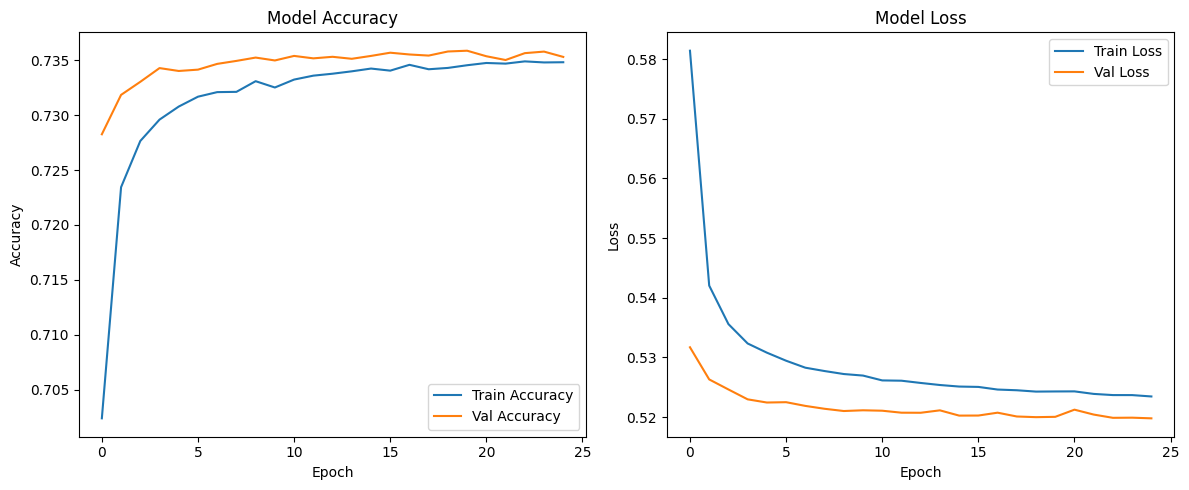

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

6196/6196 [==============================] - 14s 2ms/step
Classification Report (1D CNN):
              precision    recall  f1-score   support

          No       0.75      0.72      0.73     99169
         Yes       0.73      0.75      0.74     99095

    accuracy                           0.74    198264
   macro avg       0.74      0.74      0.74    198264
weighted avg       0.74      0.74      0.74    198264



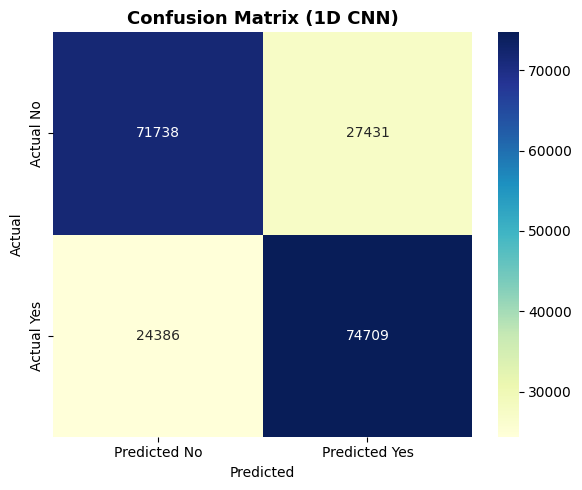

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = model.predict(X_test_cnn)
y_pred_final = (y_pred_prob > 0.5).astype(int)

print("Classification Report (1D CNN):")
print(classification_report(y_test_np, y_pred_final, target_names=['No', 'Yes']))

cm = confusion_matrix(y_test_np, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix (1D CNN)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


# Analisis Hasil

## 🧪 Evaluation Results (on Test Set)

| Model         | Precision (No) | Recall (No) | F1-Score (No) | Precision (Yes) | Recall (Yes) | F1-Score (Yes) | Accuracy |
|---------------|----------------|--------------|----------------|------------------|---------------|----------------|----------|
| **Random Forest** | 0.73           | 0.73         | 0.73           | 0.73             | 0.73          | 0.73           | 0.73     |
| **TabNet**        | 0.74           | **0.74**         | **0.74**           | **0.74**             | 0.74          | **0.74**       | **0.74** |
| **1D CNN** | **0.75**       | 0.72    | 0.73           | 0.73             | **0.76**      | **0.74**       | 0.74     |
## 📈 Insight & Analysis

- TabNet dan 1D CNN unggul secara keseluruhan dengan akurasi dan F1-score sebesar 0.74, sedikit lebih baik dibanding Random Forest.
- TabNet menunjukkan performa seimbang antara kelas No dan Yes, dengan precision, recall, dan f1-score yang konsisten di kedua kelas (semuanya 0.74).
- 1D CNN memiliki precision tertinggi di kelas No (0.75), namun recall sedikit lebih rendah (0.72). Sebaliknya, untuk kelas Yes, recall tertinggi dicapai oleh CNN (0.76), menunjukkan kemampuan mendeteksi positif dengan baik.
- Random Forest tertinggal tipis di semua metrik, dengan nilai yang seragam (0.73) namun tidak unggul di salah satu aspek tertentu.